# Oasis Infobyte - Data Science - March Phase 2


### Task 5 : Sales Prediction Using Python
### Author : Siddesh Pardeshi

# Problem Statement :

  Sales Prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset :

In [2]:
sales_df = pd.read_csv('Advertising.csv')

In [3]:
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#Dropping the unnamed column
sales_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Data Information :

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Observation :**
           From the above information there are no missing values in the dataset and all the columns have the dtype **float**.

### Data Description :

In [7]:
sales_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Observation :**

- The **average** value for **sales** is **14k** units.
- The **maximum** value for **sales** is **27k** units.
- The **maximum** amount spend on **TV, Radio and Newspaper** are **296**, **50** and **114** dollars respectively.
- The **least** amount on advertising is spend on **Radio**.

### Exploratory Data Analysis :

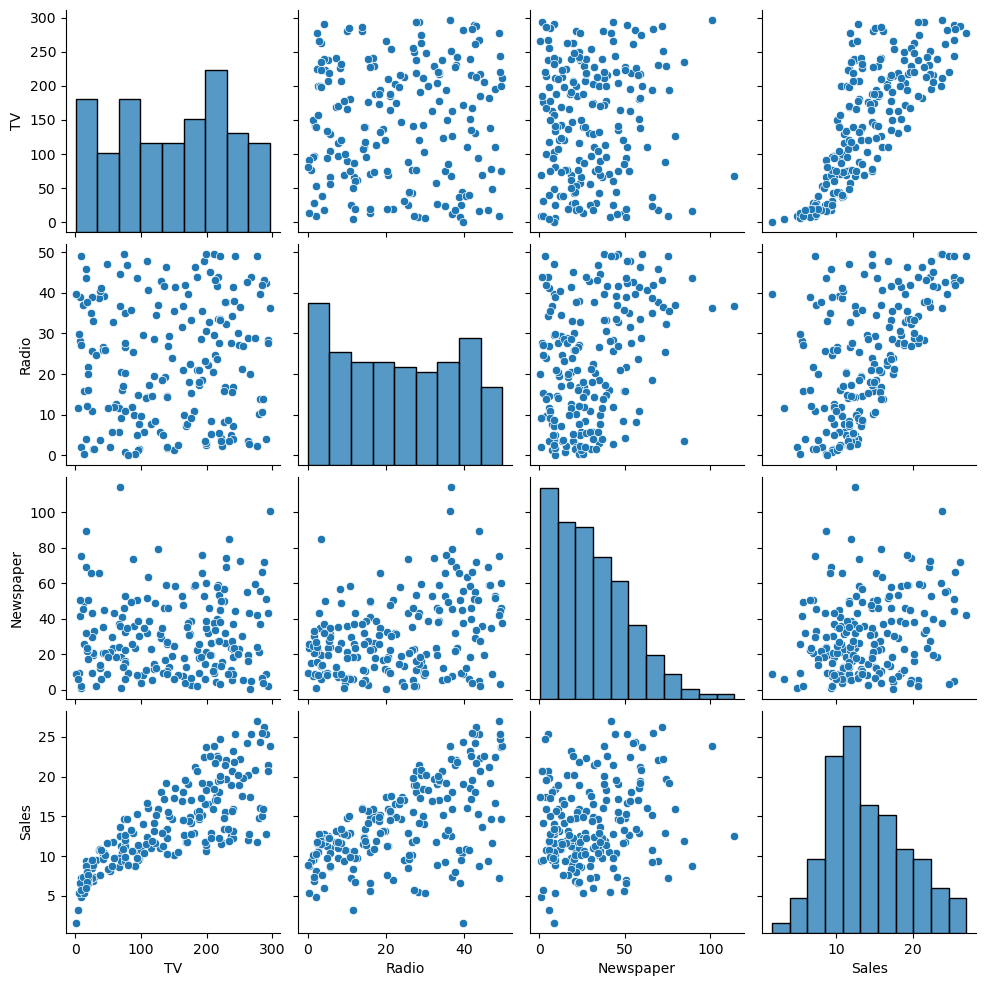

In [8]:
sns.pairplot(sales_df)

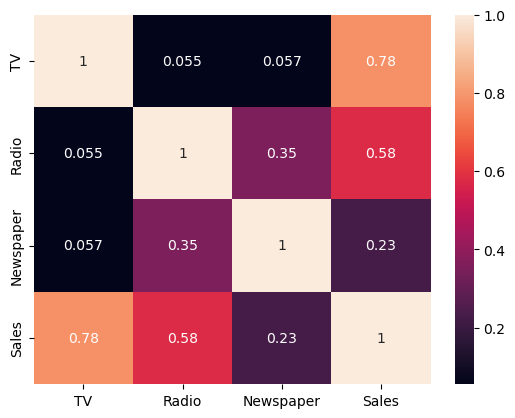

In [9]:
sns.heatmap(sales_df.corr(), annot = True)
plt.show()

**Observation :**

- **Strong** relationship between **TV ads** and **Sales**.
- **Weak** relationship between **Radio ads ** and **Sales**.
- **Very Weak** relationship between **Newapaper ads** and **Sales**.

### Train Test Split :

In [10]:
x = sales_df.drop('Sales', axis = 1)
y = sales_df['Sales']

In [11]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [12]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
#checking the shape after train-test split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


### Data Standardization :

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Development and Evaluation :

In [16]:
#importing the metrics required for evaluation

from sklearn import metrics 

### 1. Linear Regression :

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [18]:
#Predicting on train data
y_pred_train = lin_reg.predict(x_train)

#Predicting on test data
y_pred_test = lin_reg.predict(x_test)

Plotting a regplot to see how our model is performing on test data

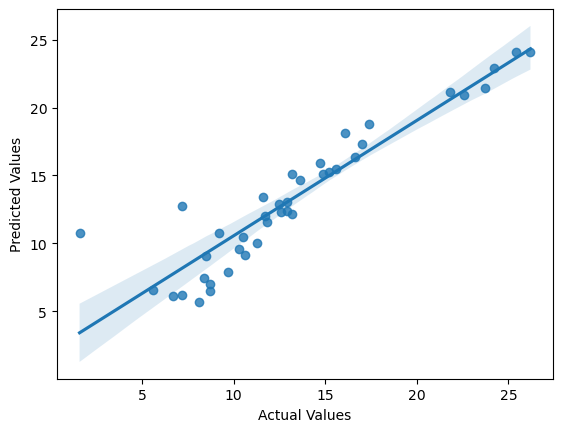

In [19]:
sns.regplot(y_test,y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**Model Evaluation :**

Computing the MSE for our Sales predictions

In [20]:
# Mean Squared Error
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [21]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 2.4068147558189064
MSE for test set is 4.402118291449682


Computing the RMSE for our Sales predictions

In [22]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [23]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.5513912323520802
RMSE for test set is 2.0981225634956795


**Model Evaluation using R2_score :**

In [24]:
r2_train = metrics.r2_score(y_train,y_pred_train)
r2_test = metrics.r2_score(y_test,y_pred_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.9067114990146382
R2 score for test set is 0.8601145185017869


### 2.  DecisionTree Regressor :

In [25]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [26]:
#Predicting on train data
y_dtree_train = dtree.predict(x_train)

#Predicting on test data
y_dtree_test = dtree.predict(x_test)

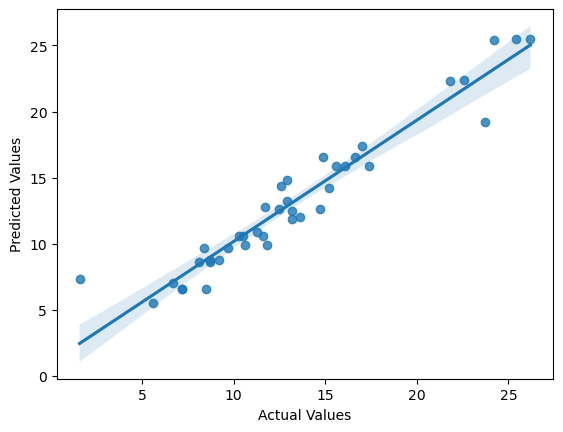

In [27]:
sns.regplot(y_test,y_dtree_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**Model Evaluation :**

In [28]:
# Mean Squared Error
MSE_train_tree = metrics.mean_squared_error(y_train, y_dtree_train)
MSE_test_tree = metrics.mean_squared_error(y_test, y_dtree_test)

In [29]:
print('MSE for training set is {}'.format(MSE_train_tree))
print('MSE for test set is {}'.format(MSE_test_tree))

MSE for training set is 0.0
MSE for test set is 2.2655


In [30]:
RMSE_train_tree = np.sqrt( metrics.mean_squared_error(y_train, y_dtree_train))
RMSE_test_tree = np.sqrt(metrics.mean_squared_error(y_test, y_dtree_test))

In [31]:
print('RMSE for training set is {}'.format(RMSE_train_tree))
print('RMSE for test set is {}'.format(RMSE_test_tree))

RMSE for training set is 0.0
RMSE for test set is 1.5051577990363667


**Model Evaluation using R2_score :**

In [32]:
r2_train_tree = metrics.r2_score(y_train,y_dtree_train)
r2_test_tree = metrics.r2_score(y_test,y_dtree_test)
print("R2 score for training set is {}".format(r2_train_tree))
print("R2 score for test set is {}".format(r2_test_tree))

R2 score for training set is 1.0
R2 score for test set is 0.9280095314681245


As we can see r2 score for test set is increased to **0.92**.